## ccdefault dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
sns.set()

In [2]:
ccdefault = pd.read_csv("ccdefault.csv")
df = ccdefault.drop(['ID'], axis = 1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
print("Number of Rows of Data = ", df.shape[0])
print("Number of Columns of Data = ", df.shape[1])

Number of Rows of Data =  30000
Number of Columns of Data =  24


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

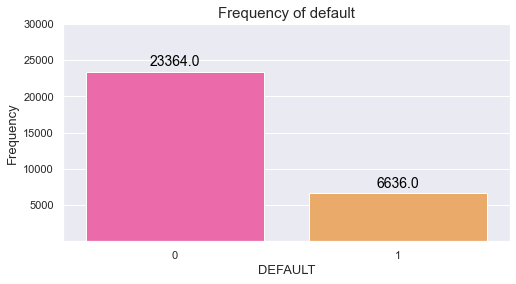

In [5]:
# bar plot of DEFAULT
value_counts = df['DEFAULT'].value_counts()
class_counts = pd.DataFrame({'Class': list(value_counts.index), 'value_count': value_counts})

plt.figure(figsize = (8,4))
g = sns.barplot(x = 'Class', y = 'value_count', data = class_counts, capsize = 0.3, palette = 'spring')
g.set_title("Frequency of default", fontsize = 15)
g.set_xlabel("DEFAULT", fontsize = 13)
g.set_ylabel("Frequency", fontsize = 13)
g.set_yticks([5000, 10000, 15000, 20000, 25000, 30000])
for p in g.patches:
    g.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha = 'center', va = 'center', xytext=(0, 10), 
                textcoords='offset points', fontsize=14, color='black')

In [6]:
X = df.drop(['DEFAULT'], axis = 1)
y = df['DEFAULT']
X.shape, y.shape

((30000, 23), (30000,))

In [7]:
# random_state from 1 to 10
random_seed = np.arange(1,11)
inSampleScore = []
outOfSampleScore = []
for i in random_seed:
    # with 90% for training and 10% for test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = i)
    clf = DecisionTreeClassifier(random_state = 123)
    clf.fit(X_train, y_train)
    inSampleScore.append(clf.score(X_train, y_train))
    outOfSampleScore.append(clf.score(X_test, y_test))

In [8]:
print("Individual accuracy scores for the in sample test (random_state from 1 to 10):")
print(np.round(inSampleScore, 6))
print("-----------------------------------------")
print("The mean for the in sample test score is:")
print(np.round(np.mean(inSampleScore), 6))
print("-----------------------------------------")
print("The standard deviation for the in sample test score is:")
print(np.round(np.std(inSampleScore), 6))

Individual accuracy scores for the in sample test (random_state from 1 to 10):
[0.999333 0.99937  0.999444 0.999407 0.999296 0.999296 0.999296 0.99937
 0.99937  0.99937 ]
-----------------------------------------
The mean for the in sample test score is:
0.999356
-----------------------------------------
The standard deviation for the in sample test score is:
4.7e-05


In [9]:
print("Individual accuracy scores for the out of sample test (random_state from 1 to 10):")
print(np.round(outOfSampleScore, 6))
print("-----------------------------------------")
print("The mean for the out of sample test score is:")
print(np.round(np.mean(outOfSampleScore), 6))
print("-----------------------------------------")
print("The standard deviation for the out of sample test score is:")
print(np.round(np.std(outOfSampleScore), 6))

Individual accuracy scores for the out of sample test (random_state from 1 to 10):
[0.723333 0.723667 0.728333 0.734667 0.727333 0.708667 0.740333 0.715333
 0.714    0.72    ]
-----------------------------------------
The mean for the out of sample test score is:
0.723567
-----------------------------------------
The standard deviation for the out of sample test score is:
0.00914


In [10]:
skf = StratifiedKFold(n_splits = 10)
clf = DecisionTreeClassifier(random_state = 123)
# evaluate on the holdout set
skf_cv_score = cross_val_score(clf, X, y, cv = skf)

In [11]:
print("Individual accuracy scores for the out of sample test:")
print(np.round(skf_cv_score, 6))
print("-----------------------------------------")
print("The mean for the out of sample test score is:")
print(np.round(np.mean(skf_cv_score), 6))
print("-----------------------------------------")
print("The standard deviation for the out of sample test score is:")
print(np.round(np.std(skf_cv_score), 6))

Individual accuracy scores for the out of sample test:
[0.709667 0.723667 0.721667 0.717333 0.715667 0.731    0.730333 0.739667
 0.733667 0.733667]
-----------------------------------------
The mean for the out of sample test score is:
0.725633
-----------------------------------------
The standard deviation for the out of sample test score is:
0.009053


<font color=blue>The results on the hold out set from for loop and StratifiedKFold are very similar.</font>

### Downsampling the majority class

In [12]:
print('Number of class 0 samples before:', np.sum(y == 0))
print('Number of class 1 samples before:', np.sum(y == 1))

Number of class 0 samples before: 23364
Number of class 1 samples before: 6636


In [13]:
X_downsampled, y_downsampled = resample(X[y == 0],
                         y[y == 0],
                         replace = True,
                         n_samples = X[y == 1].shape[0],
                         random_state = 123)
X_downsampled.shape, y_downsampled.shape

((6636, 23), (6636,))

In [14]:
print('Number of class 0 samples after:', np.sum(y_downsampled == 0))

Number of class 0 samples after: 6636


In [15]:
X_bal = np.vstack((X[y == 1], X_downsampled))
y_bal = np.hstack((y[y == 1], y_downsampled))
X_bal.shape, y_bal.shape

((13272, 23), (13272,))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size = 0.1, 
                                                    stratify = y_bal, random_state = 123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11944, 23), (1328, 23), (11944,), (1328,))

In [17]:
skf = StratifiedKFold(n_splits = 10)
clf = DecisionTreeClassifier(random_state = 123)
bal_skf_cv_score = cross_val_score(clf, X_train, y_train, cv = skf)
print("Individual accuracy scores for the out of sample test:")
print(np.round(bal_skf_cv_score, 6))
print("-----------------------------------------")
print("The mean for the out of sample test score is:")
print(np.round(np.mean(bal_skf_cv_score), 6))
print("-----------------------------------------")
print("The standard deviation for the out of sample test score is:")
print(np.round(np.std(bal_skf_cv_score), 6))

Individual accuracy scores for the out of sample test:
[0.672803 0.661925 0.67113  0.651046 0.668342 0.673367 0.643216 0.671692
 0.647404 0.644891]
-----------------------------------------
The mean for the out of sample test score is:
0.660581
-----------------------------------------
The standard deviation for the out of sample test score is:
0.011924


In [18]:
clf = DecisionTreeClassifier(random_state = 123).fit(X_train, y_train)
score = np.round(accuracy_score(y_test, clf.predict(X_test)), 6)
print("The accuracy score for test set is ", score)

The accuracy score for test set is  0.658886


**The accuracy score for both training set and test set drops a lot**

#### Hyperparameter tuning for decision tree

In [19]:
print("The max depth for a single tree is", clf.max_features_)

The max depth for a single tree is 23


In [20]:
# Using grid search cross validation to select the best parameters
skf = StratifiedKFold(n_splits = 10)
tree_paras = {'max_depth': np.arange(2, 24, 2),
              'max_features': ["auto", "sqrt", "log2"]}
tree = DecisionTreeClassifier(random_state = 123)
tree_cv = GridSearchCV(tree, tree_paras, scoring = 'accuracy', cv = skf, n_jobs = -1)
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=123), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22]),
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [21]:
print('The best training accuracy score using cv is {}'.format(np.round(tree_cv.best_score_, 4)))

The best training accuracy score using cv is 0.7063


In [22]:
print('The best parameters using cv is {}'.format(tree_cv.best_params_))

The best parameters using cv is {'max_depth': 6, 'max_features': 'auto'}


In [23]:
dt = DecisionTreeClassifier(max_depth = 6, max_features = 'auto', random_state = 123)
dt.fit(X_train, y_train)
score = np.round(accuracy_score(y_test, dt.predict(X_test)), 6)
print("The accuracy score for test set is ", score)

The accuracy score for test set is  0.685994


#### Hyperparameter tuning for Random Forest

In [24]:
# Using grid search cross validation to select the best parameters
skf = StratifiedKFold(n_splits = 10)
rf_paras = {'n_estimators': [100],
            'max_depth': np.arange(2, 12, 2),
            'min_samples_split': [2, 3, 5],
            'max_features': ["auto", "sqrt", "log2"]}
rf = RandomForestClassifier(random_state = 123)
rf_cv = GridSearchCV(rf, rf_paras, scoring = 'accuracy', cv = skf, n_jobs = -1)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=123), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  4,  6,  8, 10]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100]},
             scoring='accuracy')

In [25]:
print('The best training accuracy score using cv is {}'.format(np.round(rf_cv.best_score_, 6)))

The best training accuracy score using cv is 0.724463


In [26]:
print('The best parameters using cv is {}'.format(rf_cv.best_params_))

The best parameters using cv is {'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 100}


In [27]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 10, max_features = 'auto', 
                            min_samples_split = 5,random_state = 123)
rf.fit(X_train, y_train)
score = np.round(accuracy_score(y_test, rf.predict(X_test)), 6)
print("The accuracy score for test set is ", score)

The accuracy score for test set is  0.713102


In [28]:
print(confusion_matrix(y_test, rf.predict(X_test)))

[[555 109]
 [272 392]]


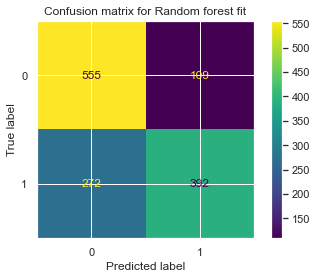

In [29]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rf.predict(X_test)), display_labels = rf.classes_).plot()
plt.title("Confusion matrix for Random forest fit")
plt.show()

In [30]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.84      0.74       664
           1       0.78      0.59      0.67       664

    accuracy                           0.71      1328
   macro avg       0.73      0.71      0.71      1328
weighted avg       0.73      0.71      0.71      1328



In [31]:
print("My name is {Jinglun Gao}")
print("My NetID is: {jinglun3}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Jinglun Gao}
My NetID is: {jinglun3}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
